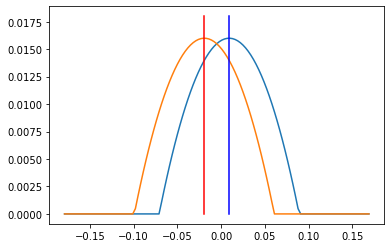

In [37]:
import numpy as np
import random
import matplotlib.pyplot as plt

def my_function(x, delta_x):
  func = -2.5*np.power(x-delta_x,2)+0.016
  func[func < 0] = 0
  return func

sensor_spacing = 0.003

x = np.arange(-0.179, 0.169 + sensor_spacing, sensor_spacing)


random.seed(84134)
delta_x = 0.011
x_offset_from_zero = random.uniform(0, sensor_spacing)
data = my_function(x + x_offset_from_zero, delta_x)

x_hat = np.sum(x * data)/np.sum(data)
x_hat_flipped = np.sum(x * np.flip(data))/np.sum(data)


plt.plot(x,data)
plt.plot(x,np.flip(data))
plt.plot([x_hat,x_hat], [0,0.018], "b")
plt.plot([x_hat_flipped,x_hat_flipped], [0,0.018], "r")

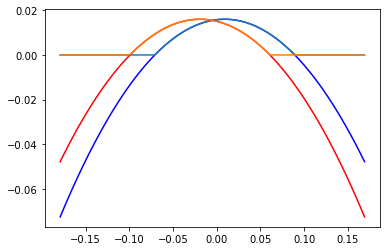

In [51]:
peak = max(data)
plt.plot(x, -2.5*np.power(x-x_hat,2) + peak, 'b')
plt.plot(x, data)
plt.plot(x, -2.5*np.power(x-x_hat_flipped,2) + peak, 'r')
plt.plot(x, np.flip(data))

k is 2.4992499249924993


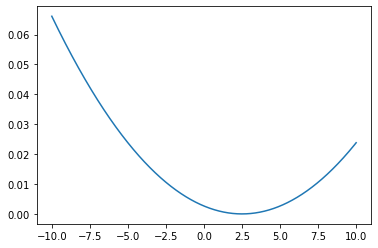

In [68]:
def plot_error(k, data, x, x_hat):
    error = data-(peak-k*np.power(x-x_hat,2))
    error[data == 0] = 0
    return np.sum(np.power(error,2))

possible_ks = np.linspace(-10,10,10000)
err=np.zeros(len(possible_ks))
ix = 0
for k in possible_ks:
    err[ix] = plot_error(k,data,x,x_hat)
    ix = ix + 1

plt.plot(possible_ks, err)

min_index = np.argmin(err)
print("k is " + str(possible_ks[min_index]))